In [105]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [106]:
tf.__version__

'2.19.0'

In [107]:
x = np.arange(-7, 15, 3)
x

array([-7, -4, -1,  2,  5,  8, 11, 14])

In [108]:
y = np.arange(3, 25, 3)
y

array([ 3,  6,  9, 12, 15, 18, 21, 24])

In [109]:
x.size, y.size, x.shape, y.shape

(8, 8, (8,), (8,))

In [110]:
x

array([-7, -4, -1,  2,  5,  8, 11, 14])

In [111]:
x_reshaped =  x.reshape(-1, 1)

In [112]:
x.reshape(-1, 1)

array([[-7],
       [-4],
       [-1],
       [ 2],
       [ 5],
       [ 8],
       [11],
       [14]])

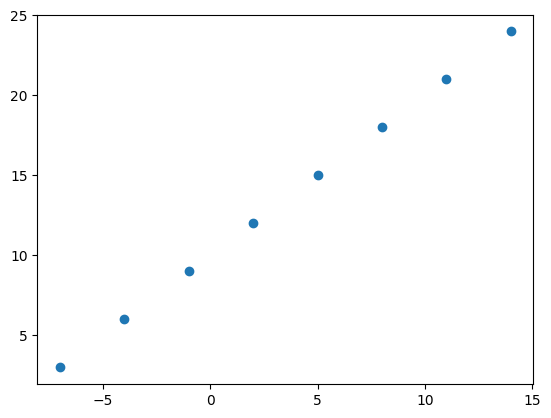

In [113]:
plt.scatter(x, y);

# Pentru a avea rezulate deterministice

In [114]:
tf.random.set_seed(42)

In [115]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
    ]
)


# !Spre deosebire de SKLEARN avem nevoie de compilare
 - In SKlearn alegeam modelul - ex LinearRegression -> facea regresia folosind o derivata specifică

In [116]:
# Compile V1 -  cu versiunea explicita - control mai bun
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["mae"]
)

In [117]:
# Compile V2 - cu versiunea declarativă

# model.compile(
#     loss="mae", ## mean absolute error
#     optimizer="sgd",
#     metrics=["mae"]
# )

In [118]:
model.fit(x.reshape(-1, 1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - loss: 15.8733 - mae: 15.8733
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.5920 - mae: 15.5920
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.3108 - mae: 15.3108
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.0295 - mae: 15.0295
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.8172 - mae: 14.8172


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - loss: 18.0326 - mae: 18.0326
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 18.0045 - mae: 18.0045
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 17.9764 - mae: 17.9764
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 17.9482 - mae: 17.9482
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 17.9201 - mae: 17.9201

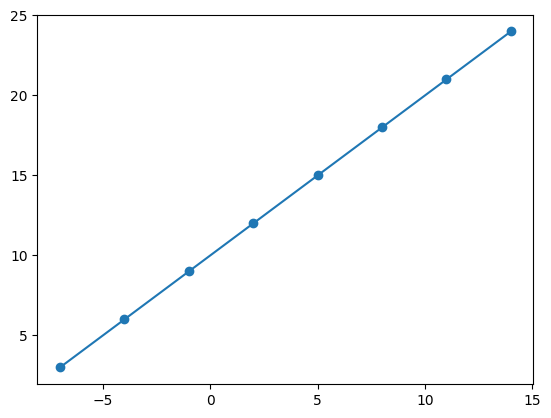

In [119]:
plt.scatter(x, y);
plt.plot(x, y);

In [120]:
model.predict(np.array([[0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.04]], dtype=float32)

## Imbunatățirea modelului - există anumite elemente pe care le pot schimba pentru a face modelul mai performant
# 1. Adaugrea mai multe straturi (layers)
# 2. Adaugarea mai multor neuroni (hidden units)
# 3. Schimbarea functiei de activare
# 4. Schimbarea optimizatorului
# 5. Schimbarea learning rate-ului din optimizator
# 6. Adăugarea mai multor date
# 7. Antrenarea pentru o perioadă mai lungă

In [121]:
#

# Schimbarea numărului de interații de la 5 la 100

In [122]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
    ]
)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(x_reshaped, y, epochs=100, verbose=0)


In [123]:
model.predict(np.array([[0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.86999947]], dtype=float32)

In [124]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [125]:
from tensorflow.keras.utils import plot_model

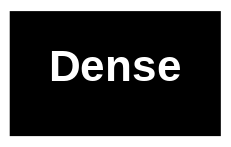

In [126]:
plot_model(model)

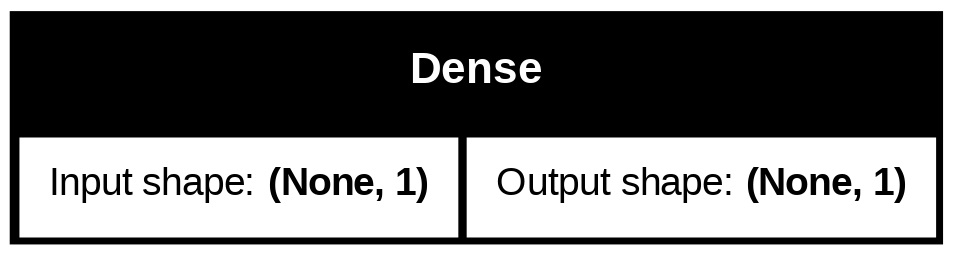

In [127]:
plot_model(model, show_shapes=True)

# Vizualizare de predicții

In [128]:
x = np.arange(-100, 100, 4)
x.shape

(50,)

In [129]:
y = np.arange(-80, 120, 4)
y.shape


(50,)

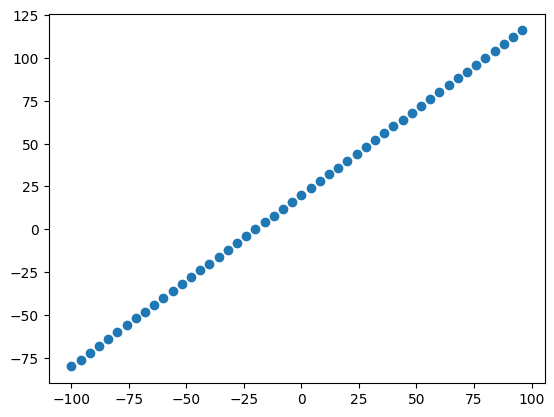

In [130]:
plt.scatter(x, y);

In [131]:
from sklearn.model_selection import train_test_split


In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

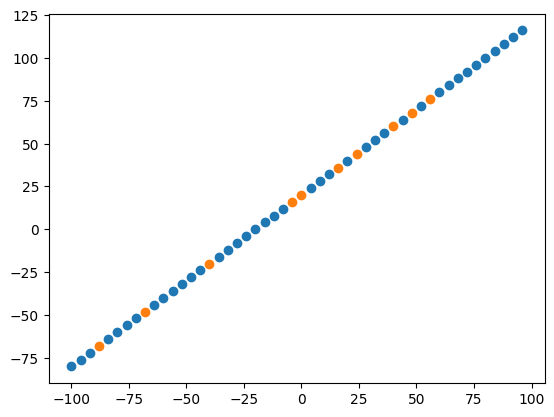

In [133]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [134]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
    ]
)
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(x_train, y_train, epochs=100, verbose=0)

In [135]:
y_prezis = model_1.predict(x_test)
y_prezis

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[  1.6843755],
       [-26.017693 ],
       [ 34.92686  ],
       [-45.40914  ],
       [ 40.467274 ],
       [ 18.305618 ],
       [-59.260178 ],
       [ -1.0858314],
       [ 29.386444 ],
       [ 12.765203 ]], dtype=float32)

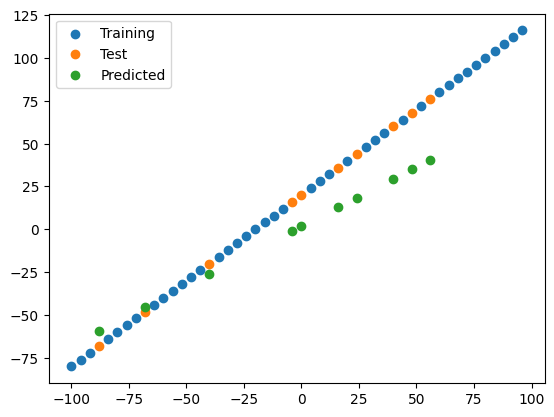

In [136]:
plt.scatter(x_train, y_train, label="Training")
plt.scatter(x_test, y_test, label="Test")
plt.scatter(x_test, y_prezis,  label="Predicted")
plt.legend();

In [137]:
model_1.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 20.0898 - mae: 20.0898


[20.08984375, 20.08984375]

In [138]:
mae = tf.metrics.mae(y_test, y_prezis)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.315624 ,  6.0176926, 33.07314  ,  2.5908585, 35.532726 ,
       25.694382 ,  8.739822 , 17.08583  , 30.613556 , 23.234797 ],
      dtype=float32)>

## Imbunatățirea modelului prin adăugarea unui alt layer

# model_2 - are 2 layere in loc de 1

In [142]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1), ## Adaugarea unui alt layer dense
    ]
)
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [143]:
y_prezis = model_2.predict(x_test)
y_prezis

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[  2.7679455 ],
       [-20.43879   ],
       [ 30.61603   ],
       [-36.683502  ],
       [ 35.257374  ],
       [ 16.691986  ],
       [-48.28687   ],
       [  0.44727194],
       [ 25.974682  ],
       [ 12.050639  ]], dtype=float32)

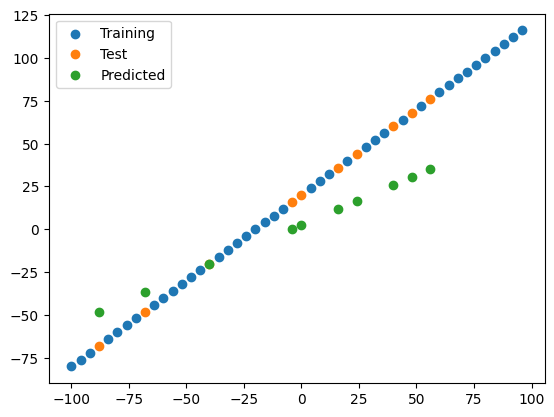

In [144]:
plt.scatter(x_train, y_train, label="Training")
plt.scatter(x_test, y_test, label="Test")
plt.scatter(x_test, y_prezis,  label="Predicted")
plt.legend();

# Imbunatatirea modelului - adaugarea rularea pentru 500 de epoci in loc de 100

In [145]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1), ## V2 -  Adaugarea unui alt layer dense
    ]
)
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_3.fit(x_train, y_train, epochs=500, verbose=0) ## V3 -  Schimbarea cu 500 in loc de 100

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 126.1361 - mae: 126.1361 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 41.8633 - mae: 41.8633
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20.3619 - mae: 20.3619
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.8074 - mae: 23.8074
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26.1740 - mae: 26.1740
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25.6141 - mae: 25.6141
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 26.1058 - mae: 26.1058
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25.5739 - mae: 25.5739
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26.0773 - mae: 26.0773
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25.5489 - mae: 25.5489
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 26.0542 - mae: 26.0542
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 25.6988 - mae: 25.6988
Epoch 13/500
2/2 ━━━━━

In [146]:
y_prezis = model_3.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


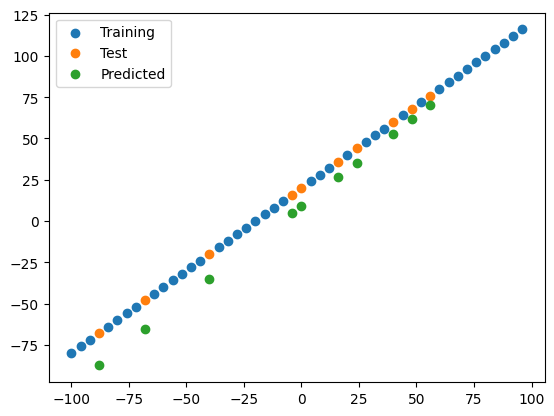

In [147]:
plt.scatter(x_train, y_train, label="Training")
plt.scatter(x_test, y_test, label="Test")
plt.scatter(x_test, y_prezis,  label="Predicted")
plt.legend();

In [148]:
model.save("model_3.keras")